In [1]:
import numpy as np
import pandas as pd
import torch
from RL.Utils import plot_test, open_test, test_episode_agent
from RL.Environment import MarketGym, free_step
from RL.Rewards import vwap_reward
from RL.Agents import DQN, TWAP, POV
import matplotlib.pyplot as plt
from collections import Counter
import json
plt.style.use('./solarized_dark.mplstyle')
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (20,4)
plt.rcParams['axes.grid'] = True

env = MarketGym('./episodes', vwap_reward)

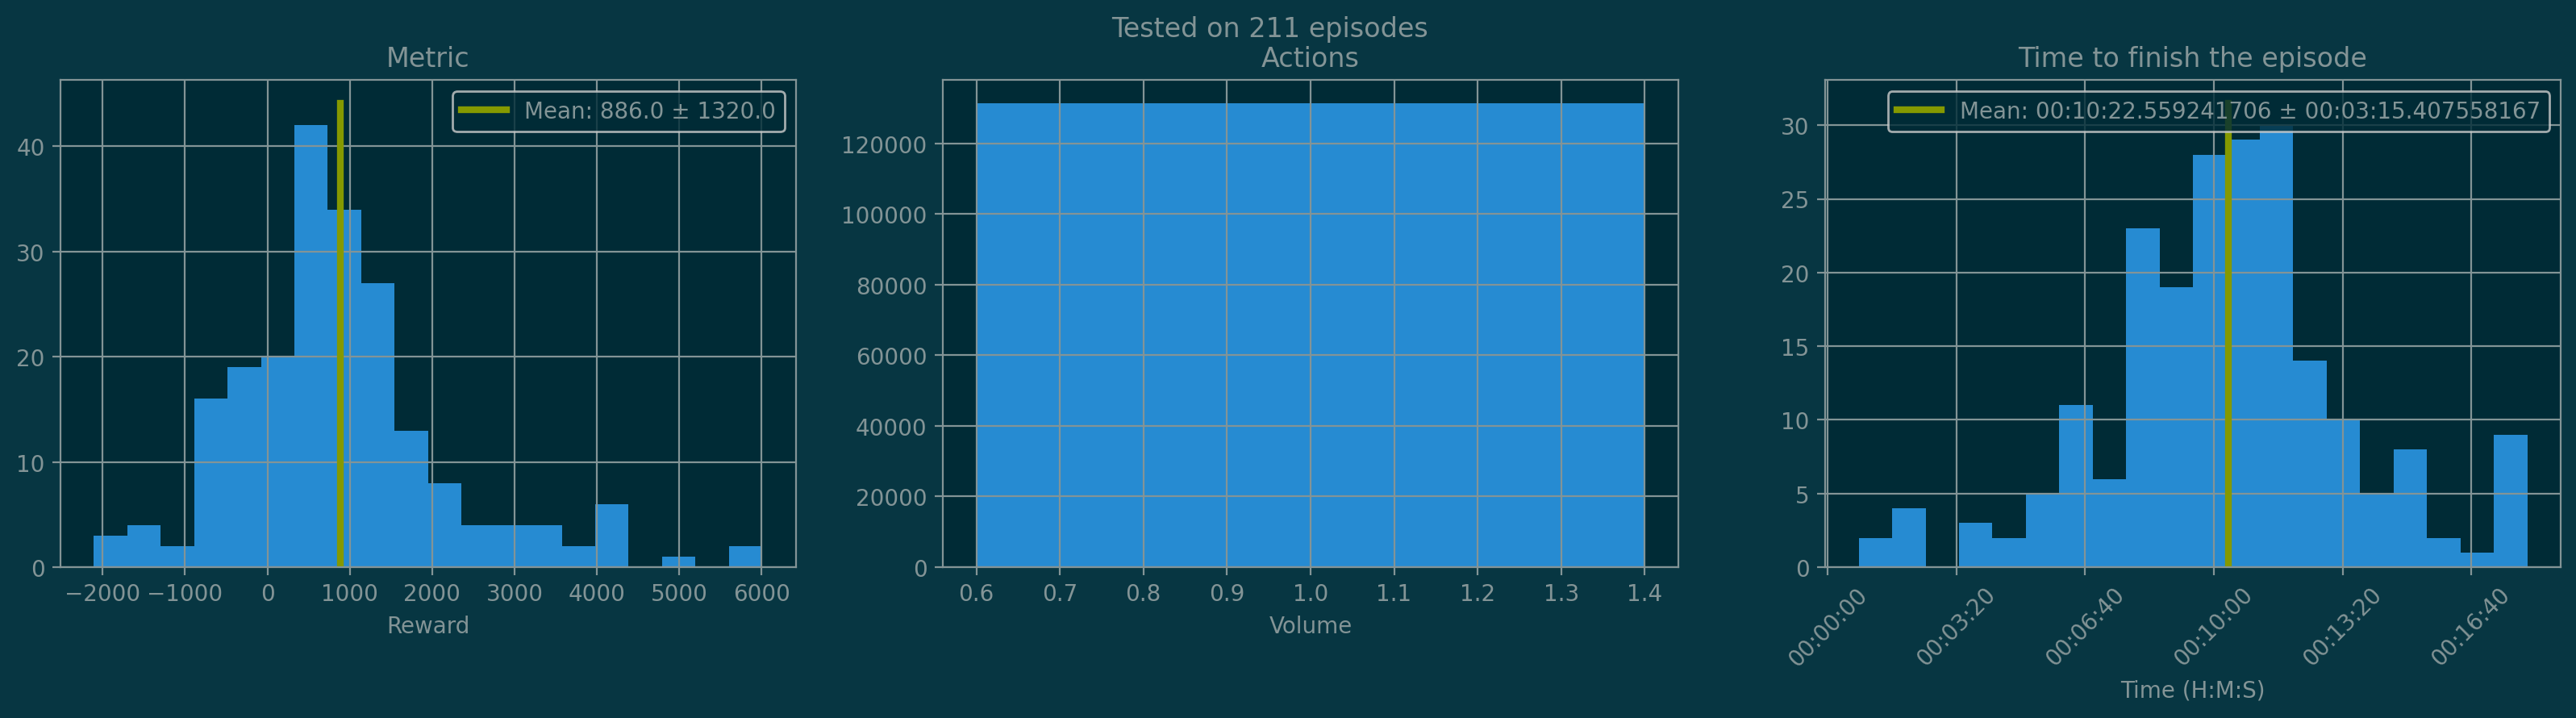

In [2]:
plot_test("test/DDQN_pretrained_2021-03-28_14-58-48.pickle", "./episodes")

DQN
Total rewards: 1,188.1854661846864


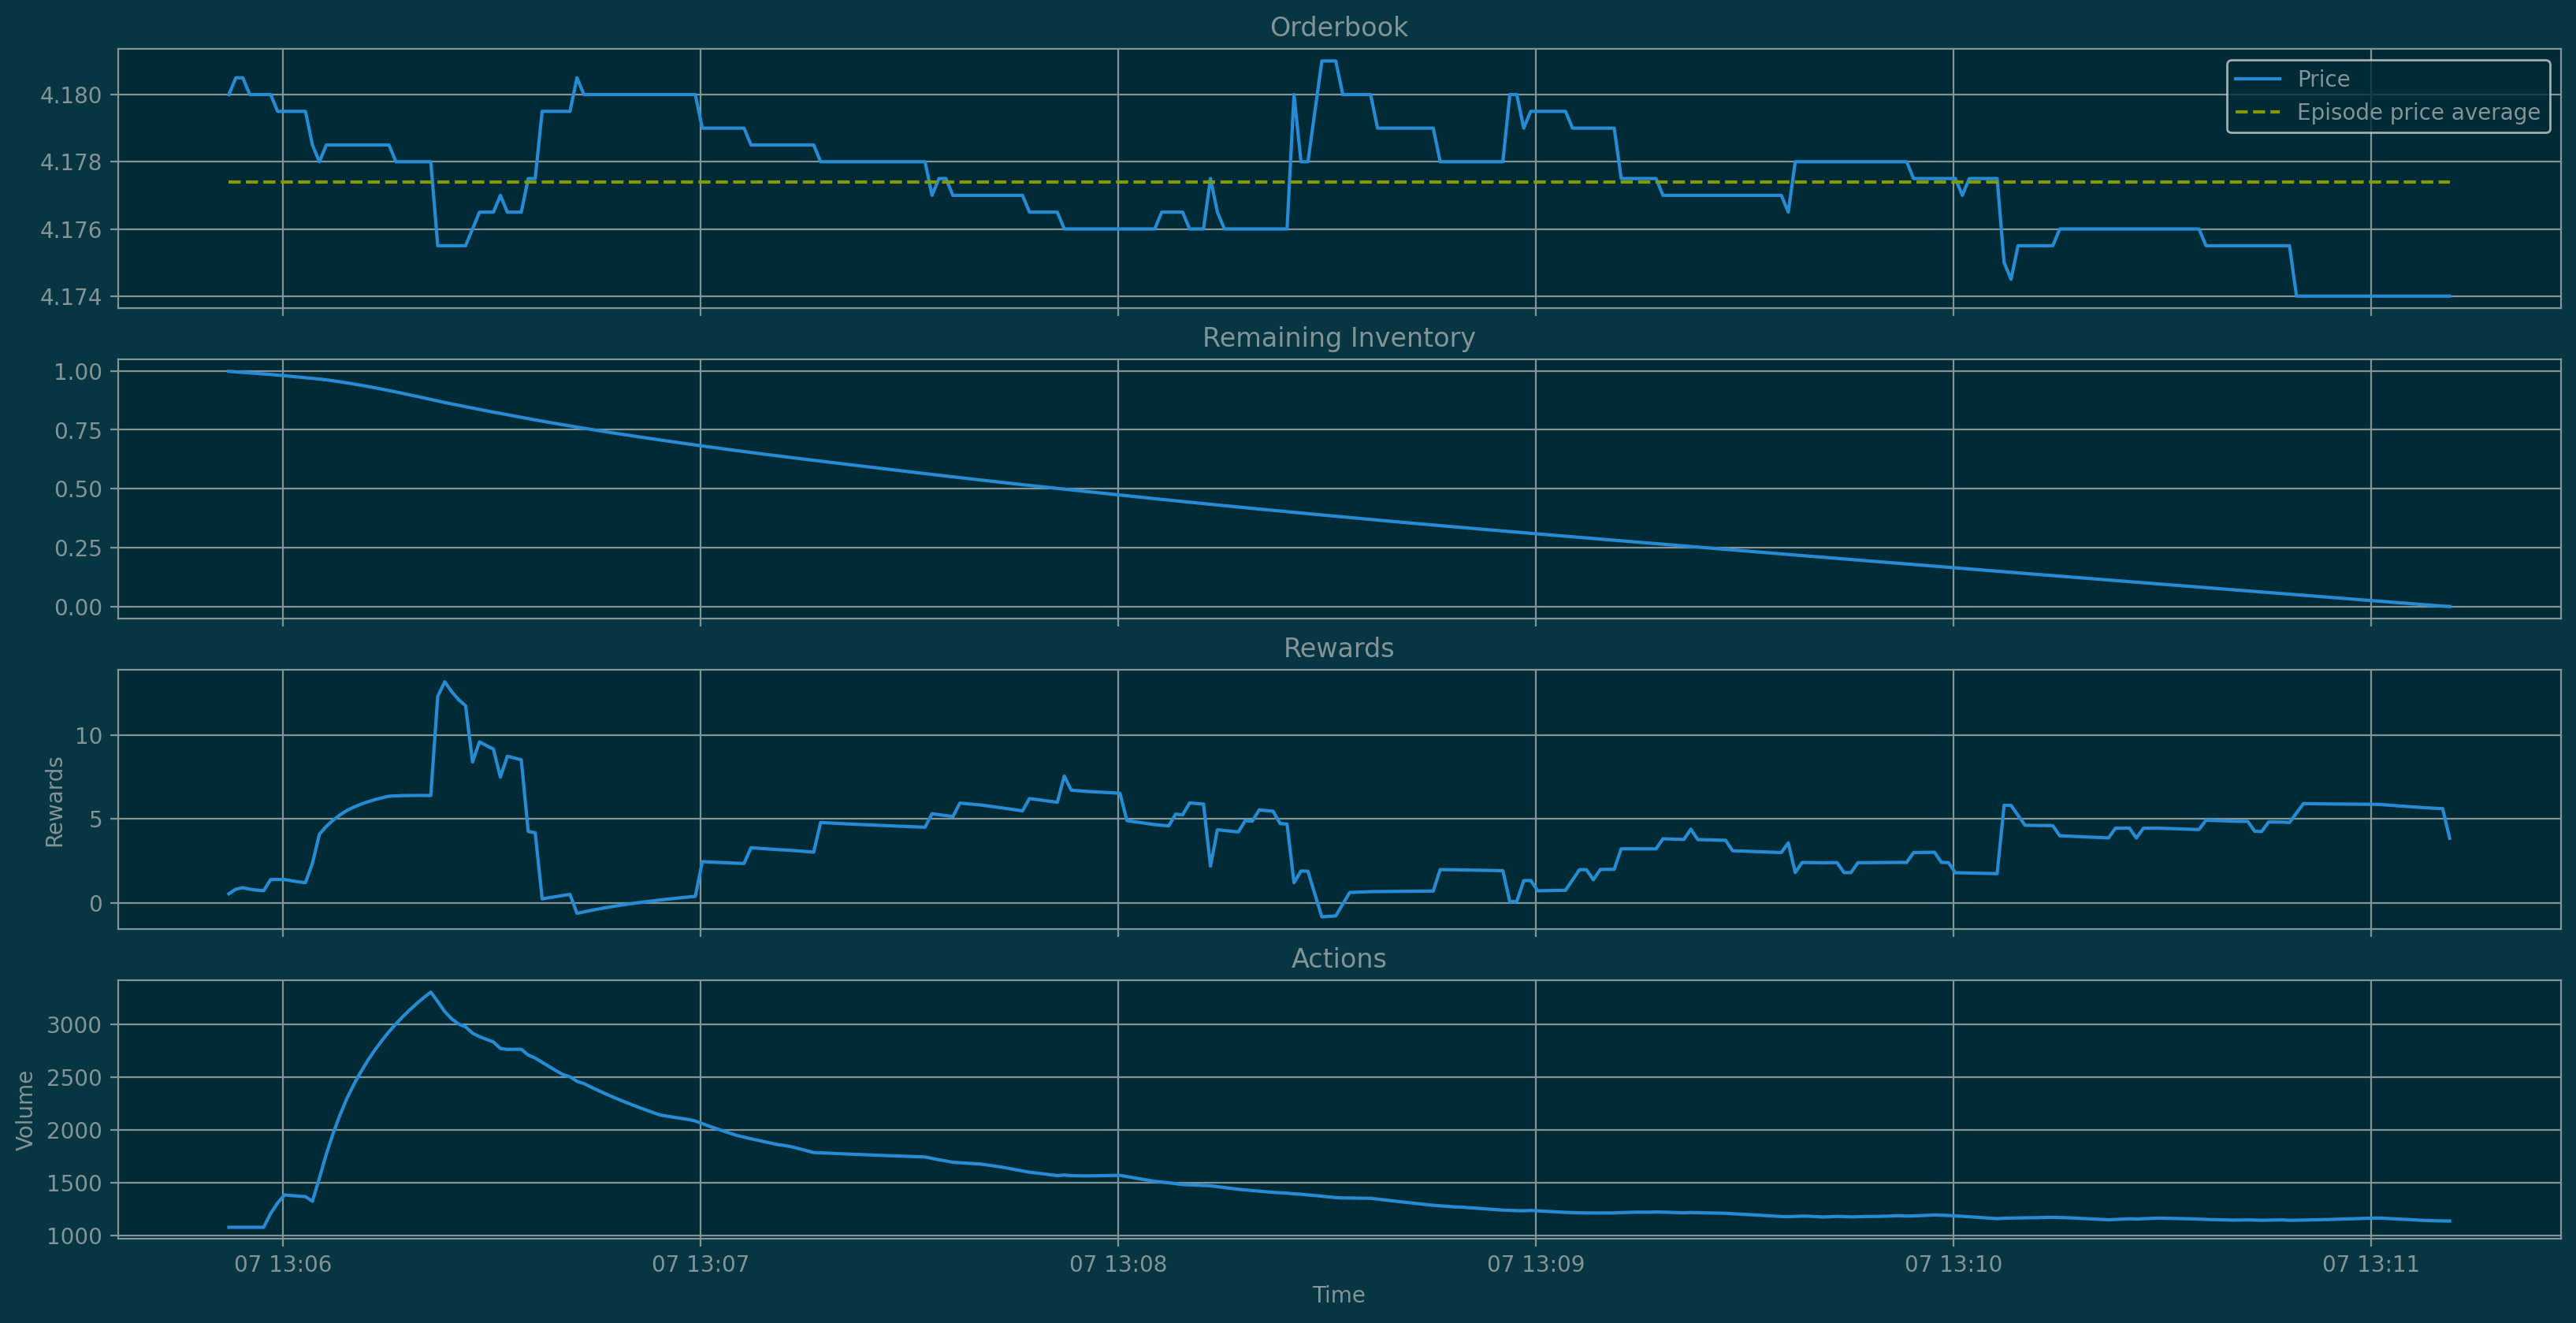

In [4]:
random_seed = 2
weights = "./weights/DDQN_pretrained_2021-03-28_14-58-48.pt"
dqn = DQN(env, 1e-4, 0.999, 0.1, double=True, save=weights)
dqn.Q_net.load_state_dict(torch.load(weights))
test_episode_agent(env, dqn, name="DQN", random_seed=random_seed)

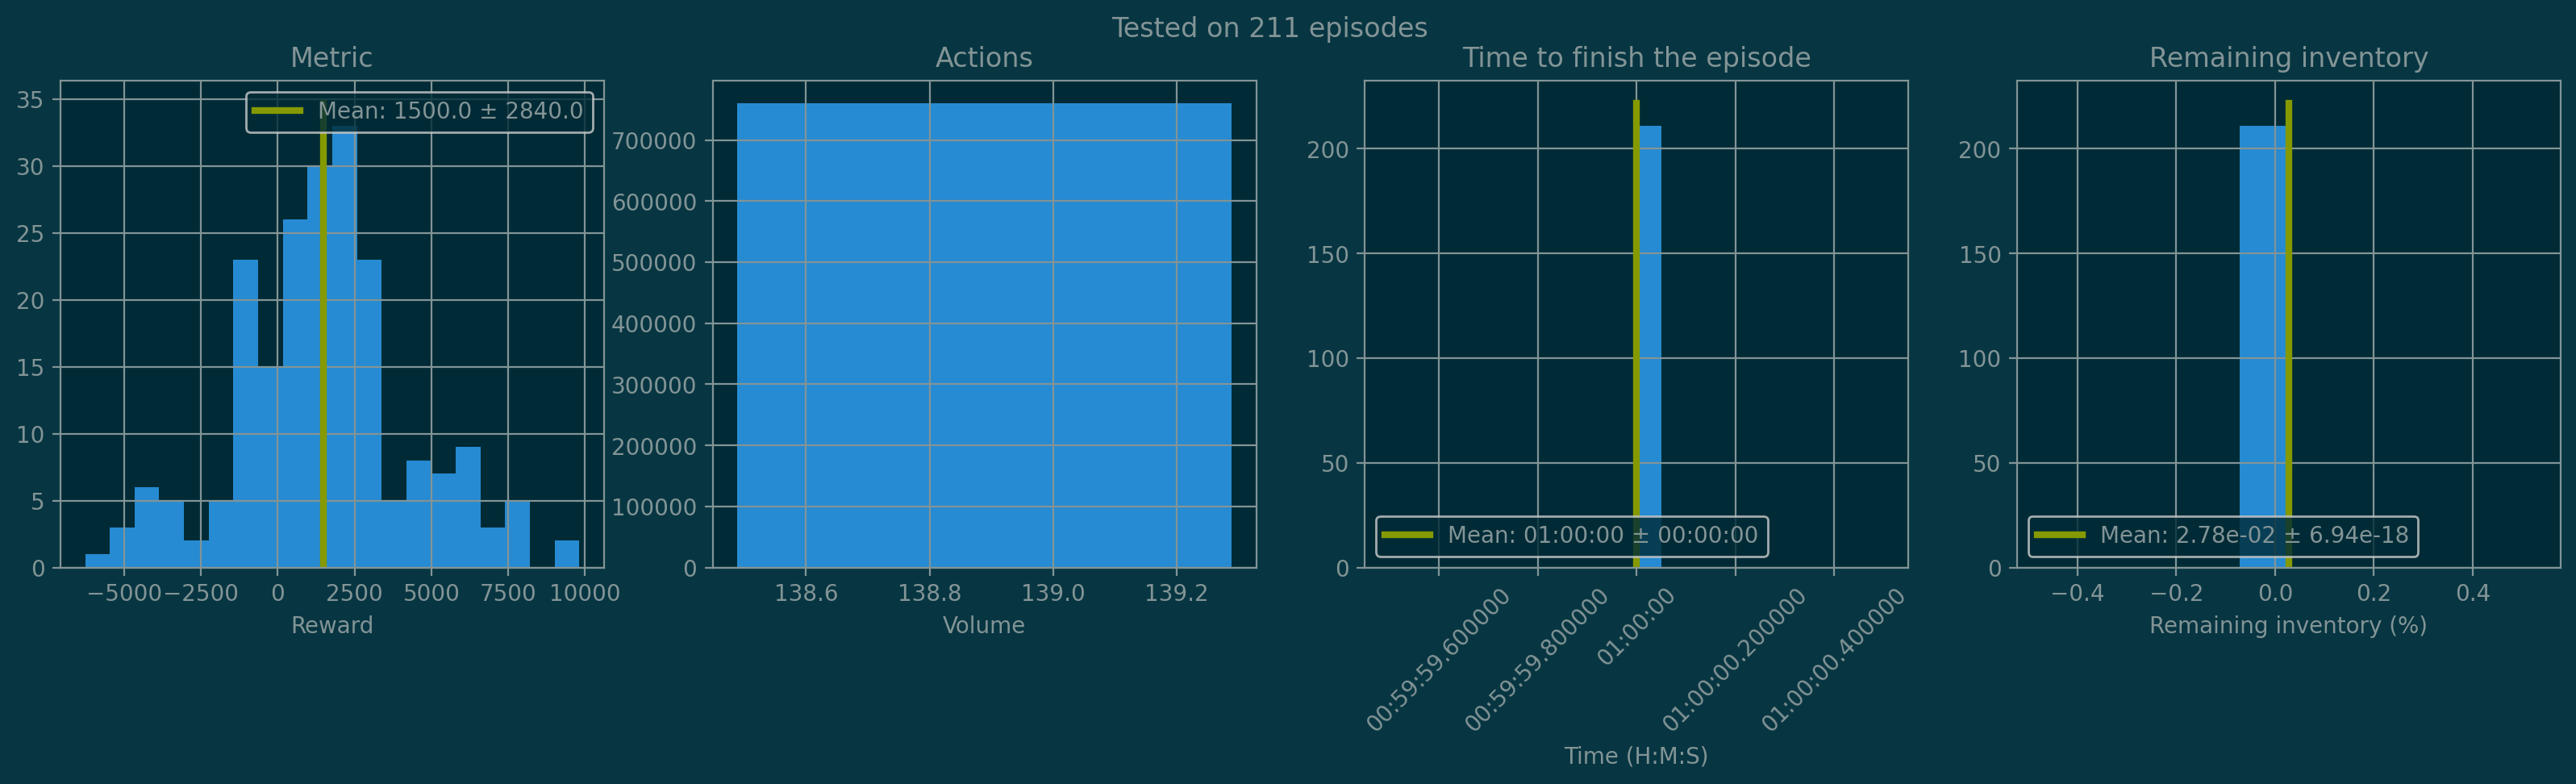

In [6]:
plot_test("./test/twap_2021-03-14_12-38-30.pickle", "./episodes")

TWAP
Total rewards: -3,815.5515509523


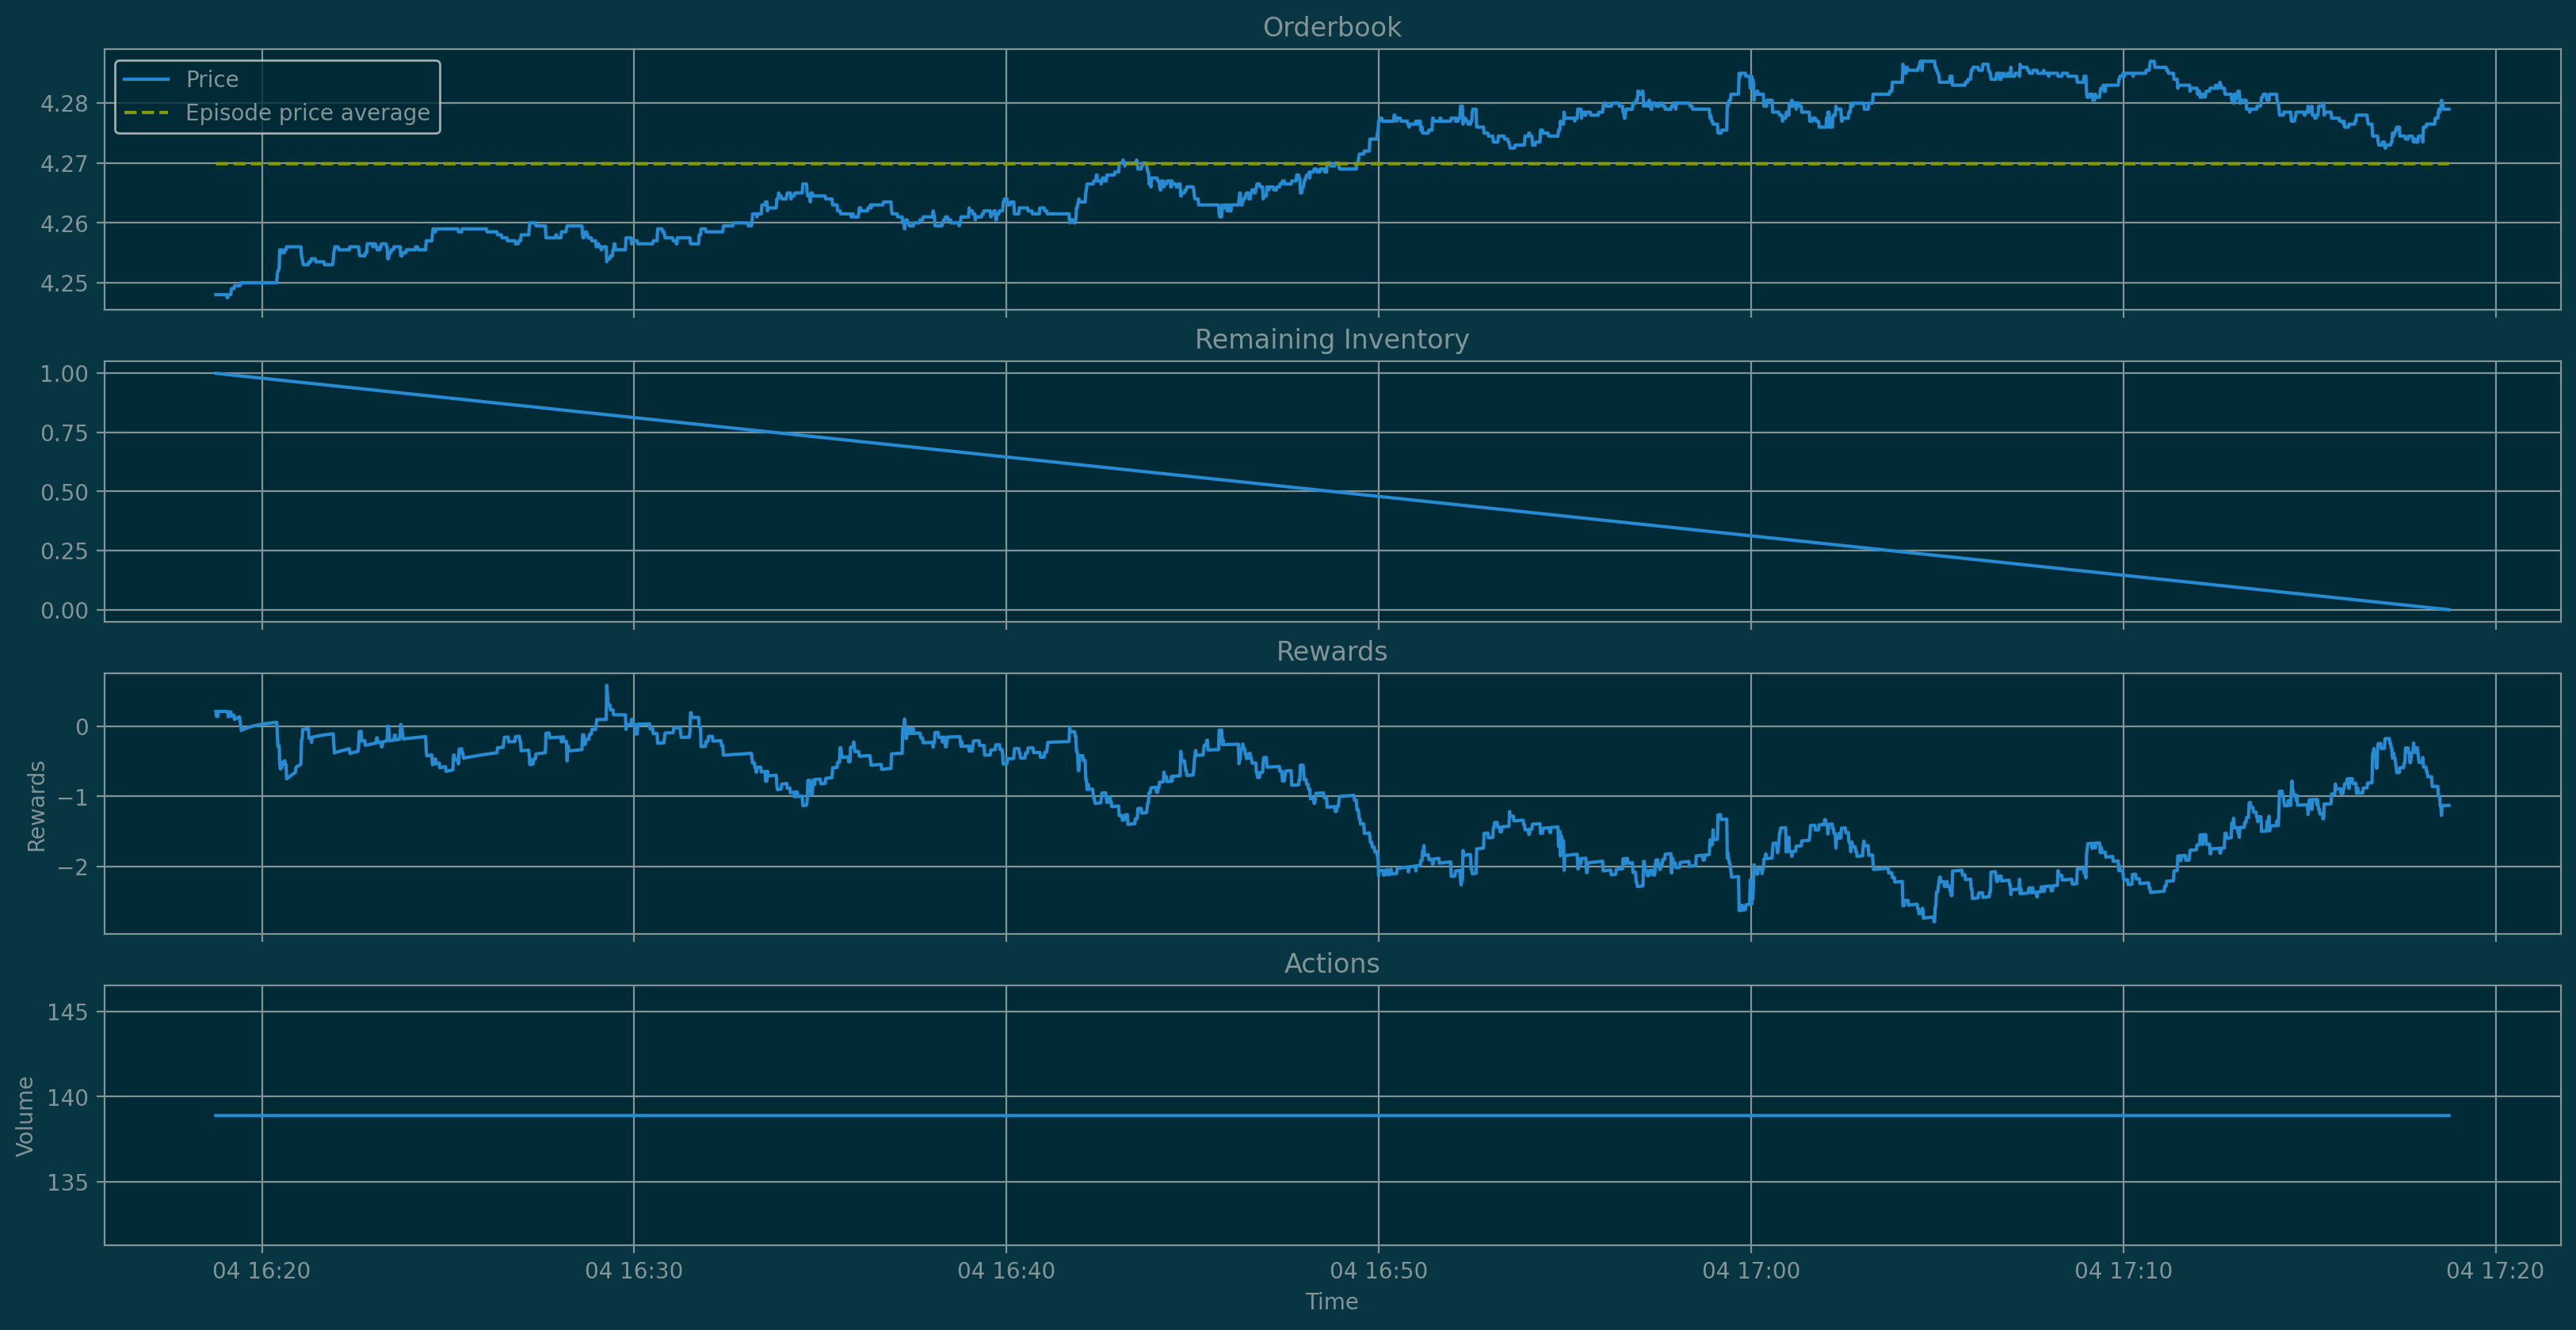

In [7]:
random_seed = 0
twap = TWAP()
env.step = free_step(env)
twap.train(env)
test_episode_agent(env, twap, name="TWAP", random_seed=random_seed)

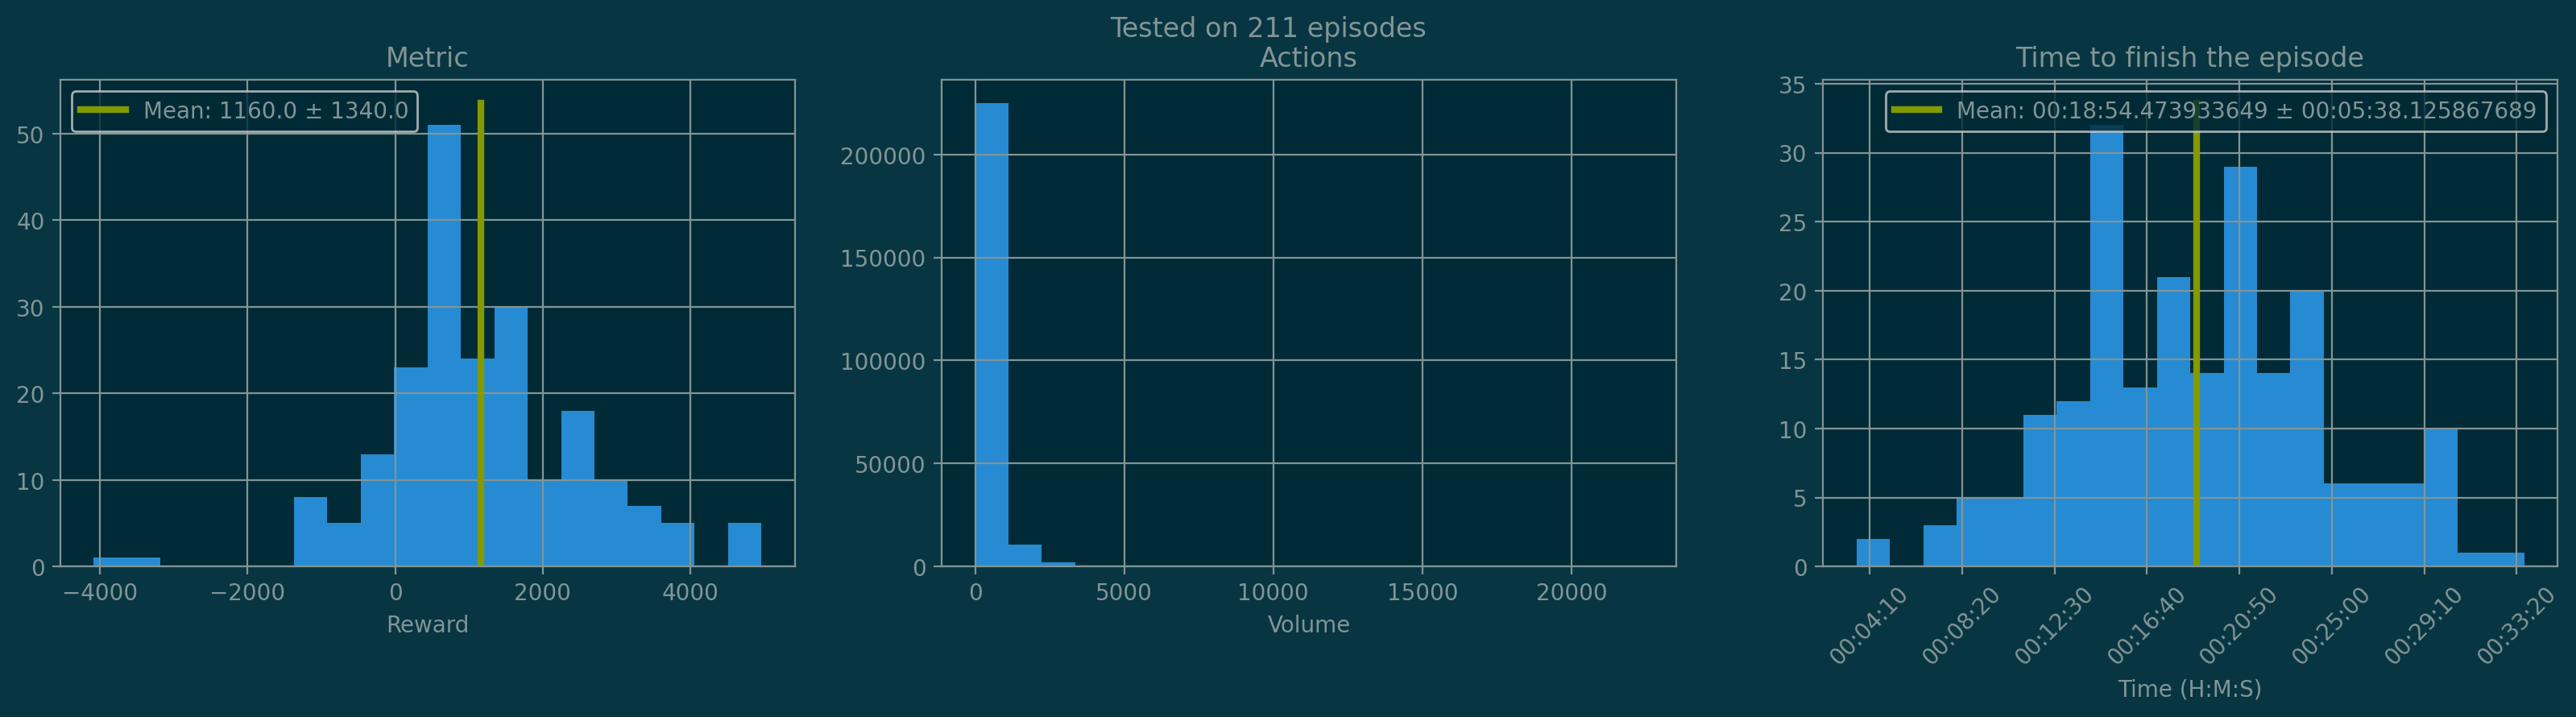

In [8]:
plot_test("./test/pov_2021-03-14_12-38-30.pickle", "./episodes")

POV
Total rewards: -789.8990039590456


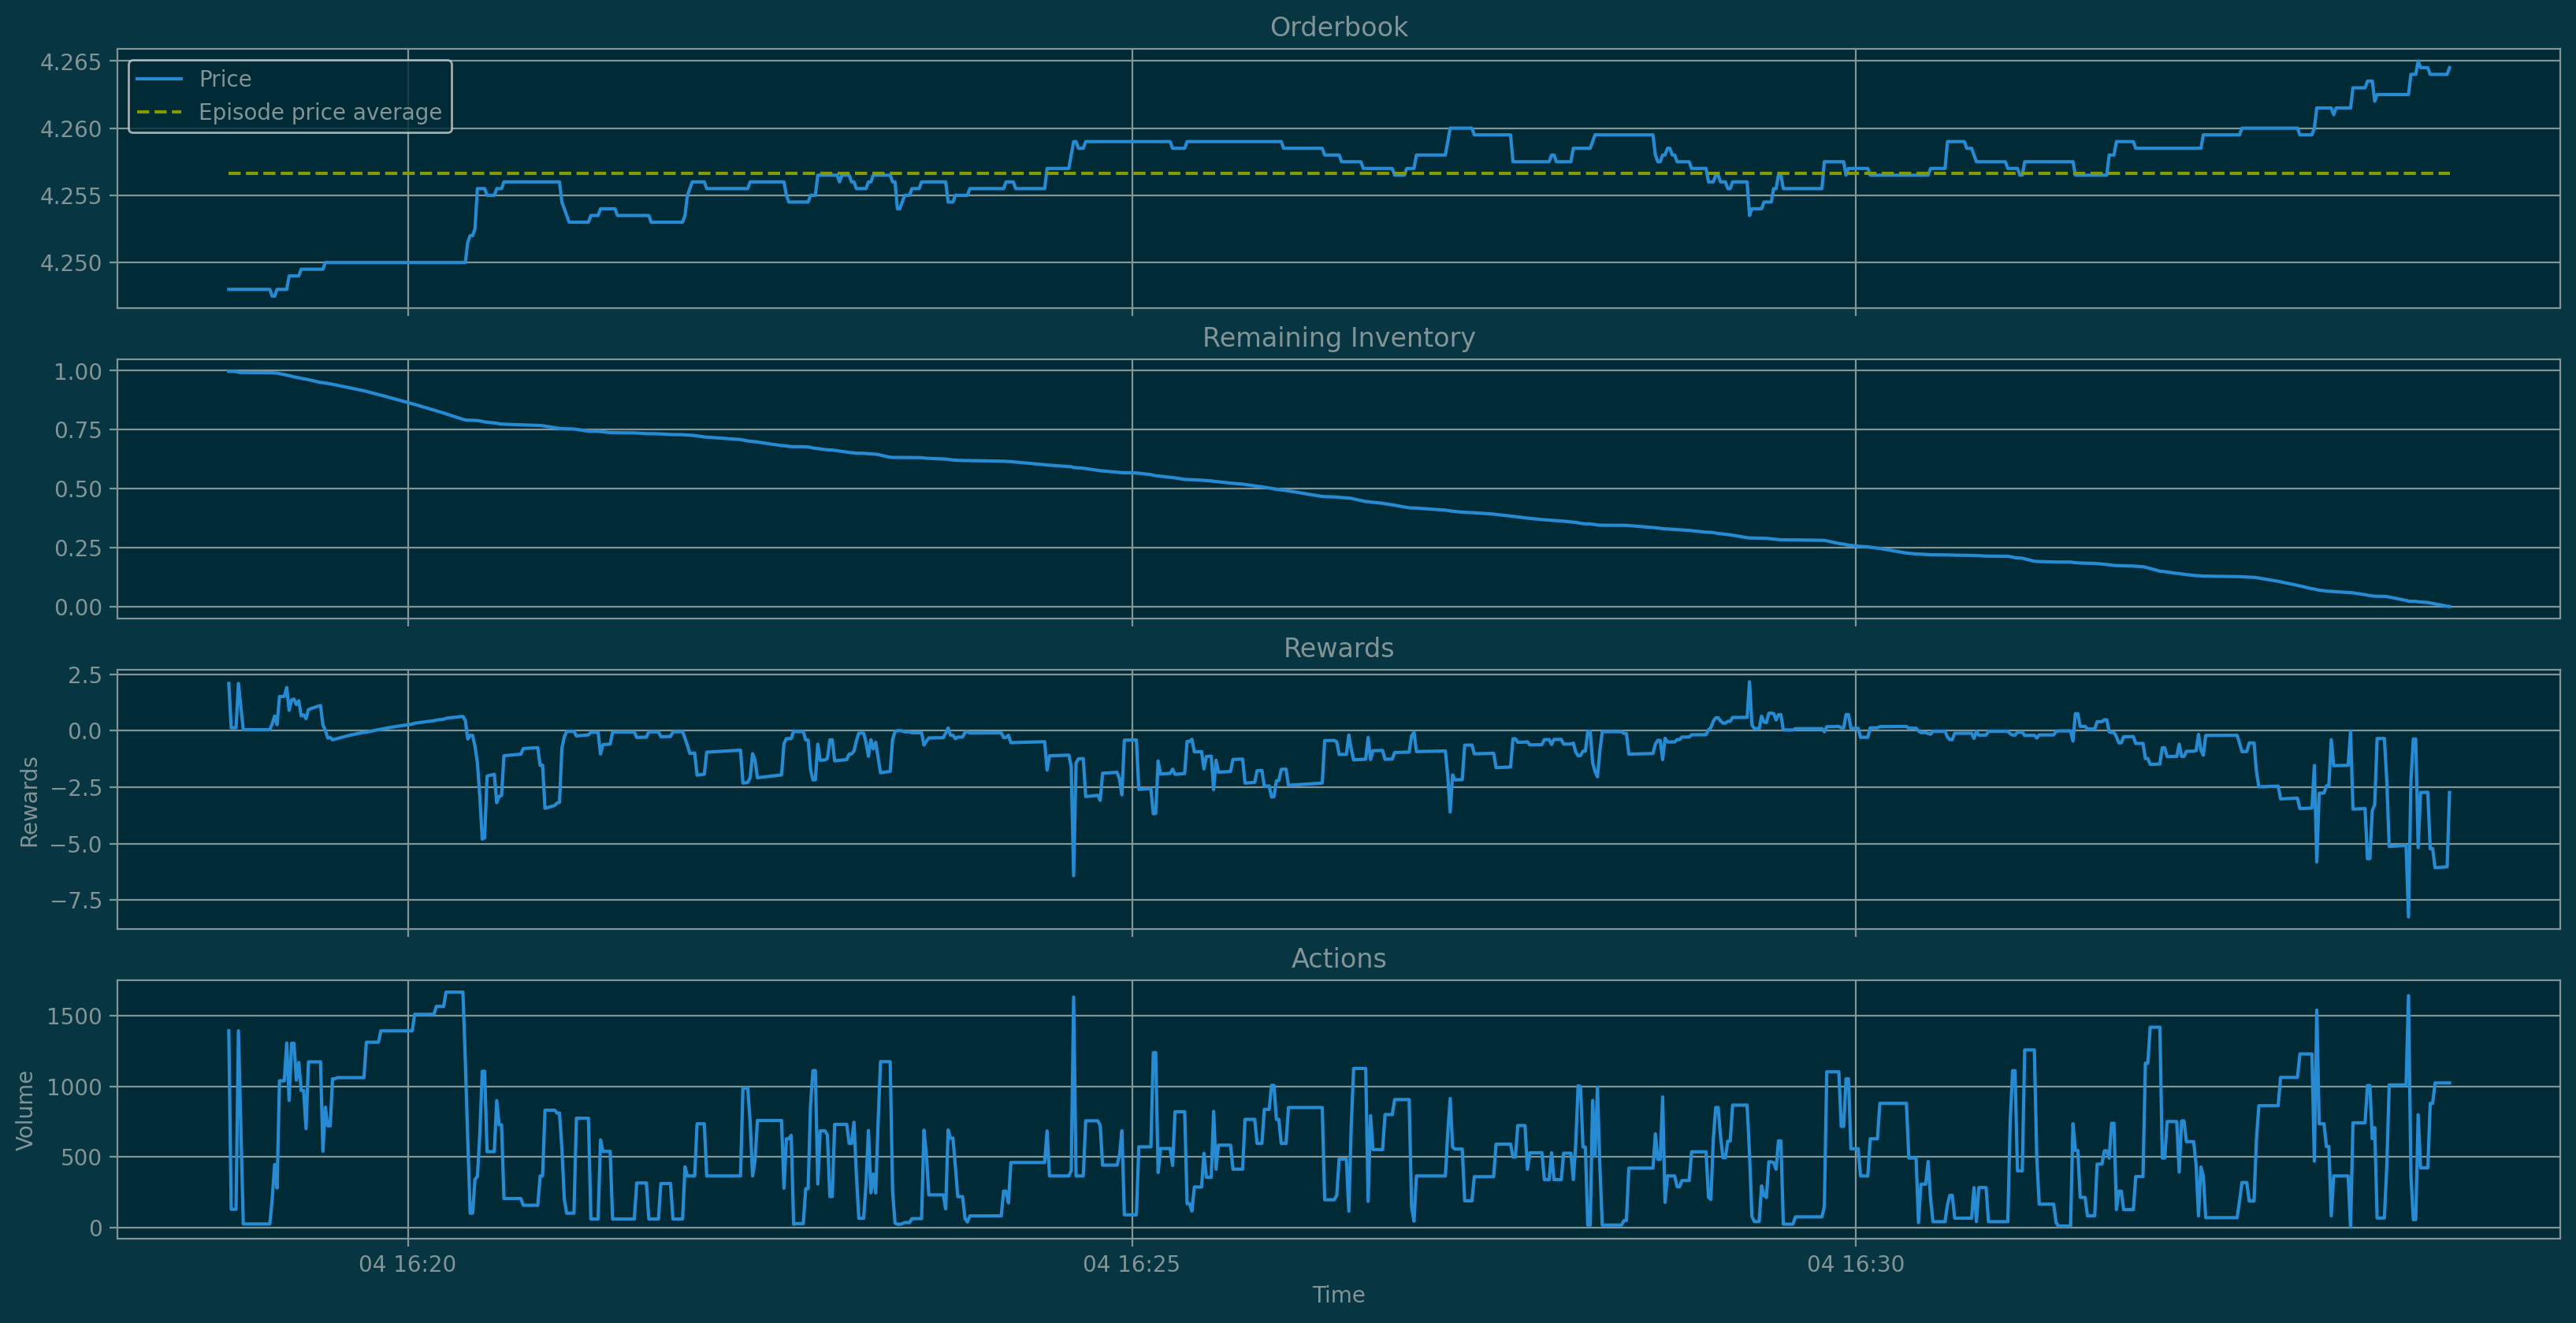

In [9]:
pov = POV(0.1)
test_episode_agent(env, pov, name="POV", random_seed=random_seed, episode_retrain=True)